In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BlinkIT Grocery Data.xlsx to BlinkIT Grocery Data.xlsx


In [3]:
df = pd.read_excel("BlinkIT Grocery Data.xlsx")
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [4]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [6]:
# Check unique values before cleaning
# Corrected column name from 'Item_Fat_Content' to 'Item Fat Content'
df['Item Fat Content'].unique()

# Replace inconsistent names with standard ones
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Verify changes
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [14]:
# Impute missing 'Item Weight' values with the mean
mean_item_weight = df['Item Weight'].mean()
df['Item Weight'].fillna(mean_item_weight, inplace=True)

# Verify that there are no more missing values
print("Non-null counts after imputing Item Weight:")
print(df.info())

# Create a new feature 'Outlet Age'
current_year = 2022
df['Outlet Age'] = current_year - df['Outlet Establishment Year']

print("\nFirst 5 rows with the new 'Outlet Age' column:")
print(df[['Outlet Establishment Year', 'Outlet Age']].head())

Non-null counts after imputing Item Weight:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
N

/tmp/ipython-input-3376273898.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item Weight'].fillna(mean_item_weight, inplace=True)


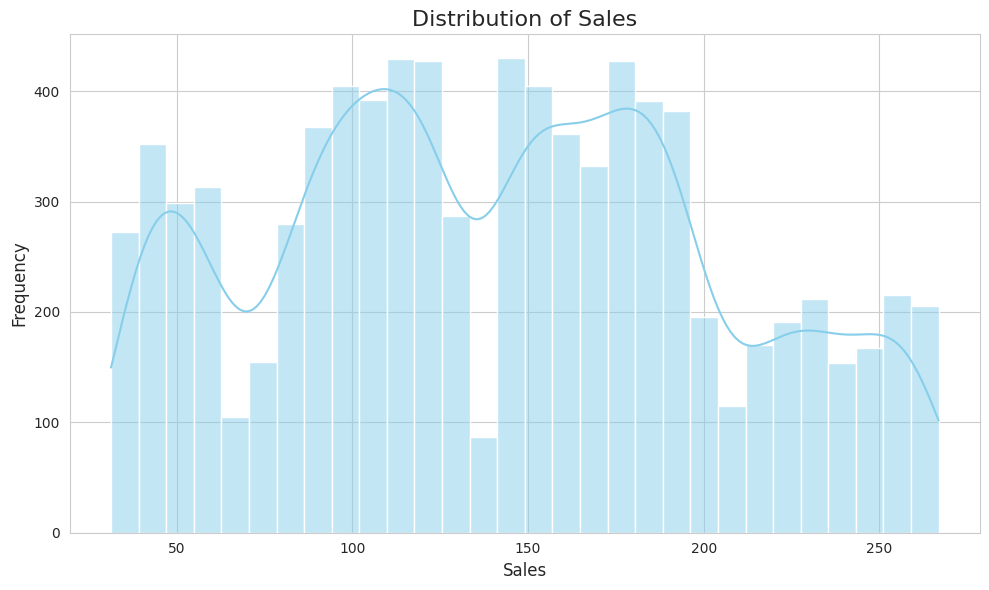

In [15]:
sns.set_style("whitegrid")

# Create a histogram for the 'Sales' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2008690780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet Type', y='Sales', data=outlet_sales, palette='viridis')


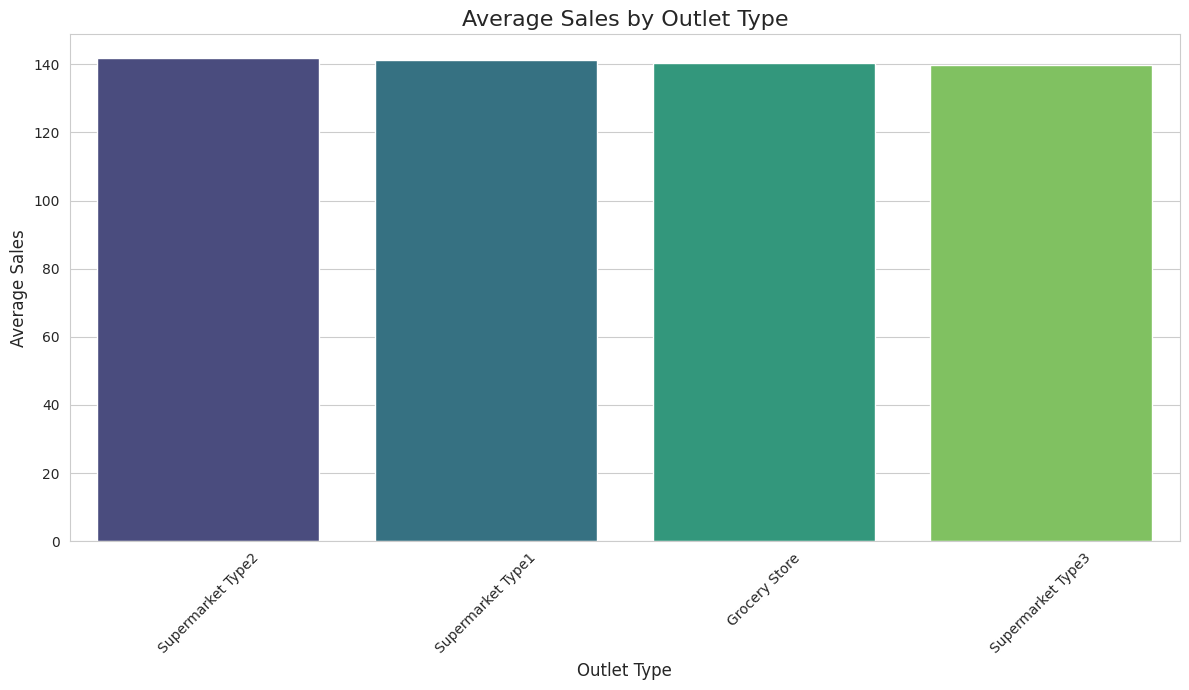

In [16]:

# Calculate the mean sales for each 'Outlet Type'
outlet_sales = df.groupby('Outlet Type')['Sales'].mean().sort_values(ascending=False).reset_index()

# Create a bar chart for average sales per outlet type
plt.figure(figsize=(12, 7))
sns.barplot(x='Outlet Type', y='Sales', data=outlet_sales, palette='viridis')
plt.title('Average Sales by Outlet Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3613896694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Fat Content', y='Sales', data=df, palette='viridis')


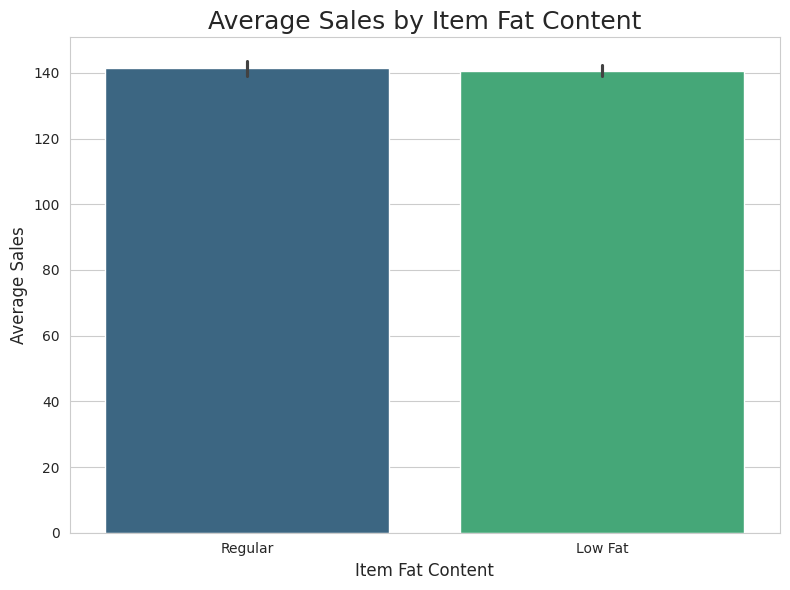

In [18]:
# 2. Bar Plot: Average Sales by Item Fat Content
# This plot compares the average sales of 'Low Fat' vs 'Regular' items
plt.figure(figsize=(8, 6))
sns.barplot(x='Item Fat Content', y='Sales', data=df, palette='viridis')
plt.title('Average Sales by Item Fat Content', fontsize=18)
plt.xlabel('Item Fat Content', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.tight_layout()
plt.show()


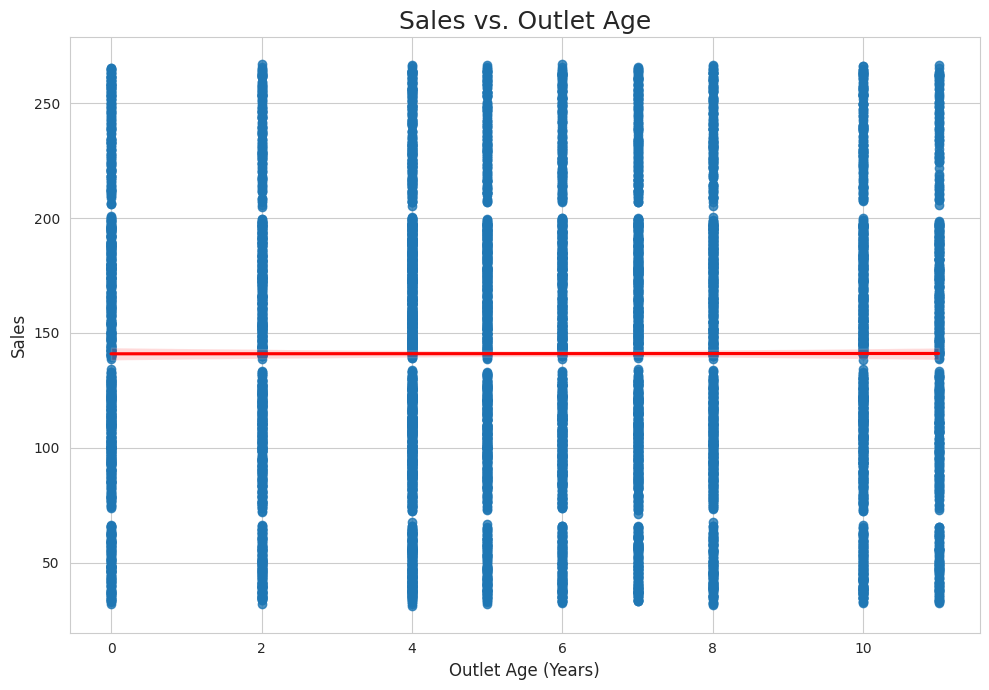

In [19]:

# 3. Scatter Plot with Regression Line: Sales vs. Outlet Age
# This plot helps us visualize the relationship between how old an outlet is and its sales
plt.figure(figsize=(10, 7))
sns.regplot(x='Outlet Age', y='Sales', data=df, line_kws={'color': 'red'})
plt.title('Sales vs. Outlet Age', fontsize=18)
plt.xlabel('Outlet Age (Years)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.tight_layout()
plt.show()

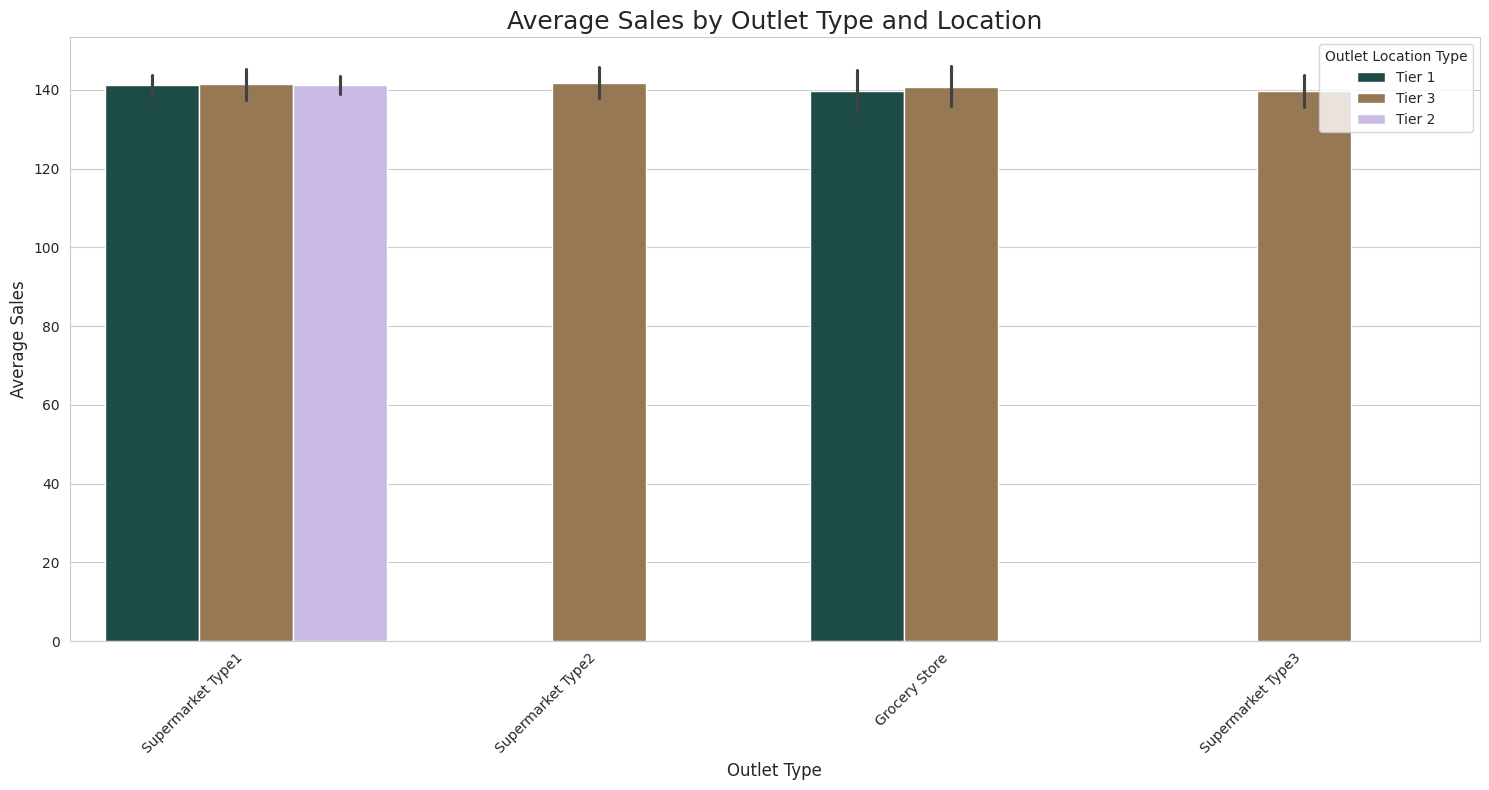

In [20]:

# 4. Grouped Bar Plot: Average Sales by Outlet Type and Location
# This plot shows a more detailed view of average sales,
# broken down by both the type and location of the outlet.
plt.figure(figsize=(15, 8))
sns.barplot(x='Outlet Type', y='Sales', hue='Outlet Location Type', data=df, palette='cubehelix')
plt.title('Average Sales by Outlet Type and Location', fontsize=18)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3445413869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet Establishment Year', data=df, palette='Blues_d')


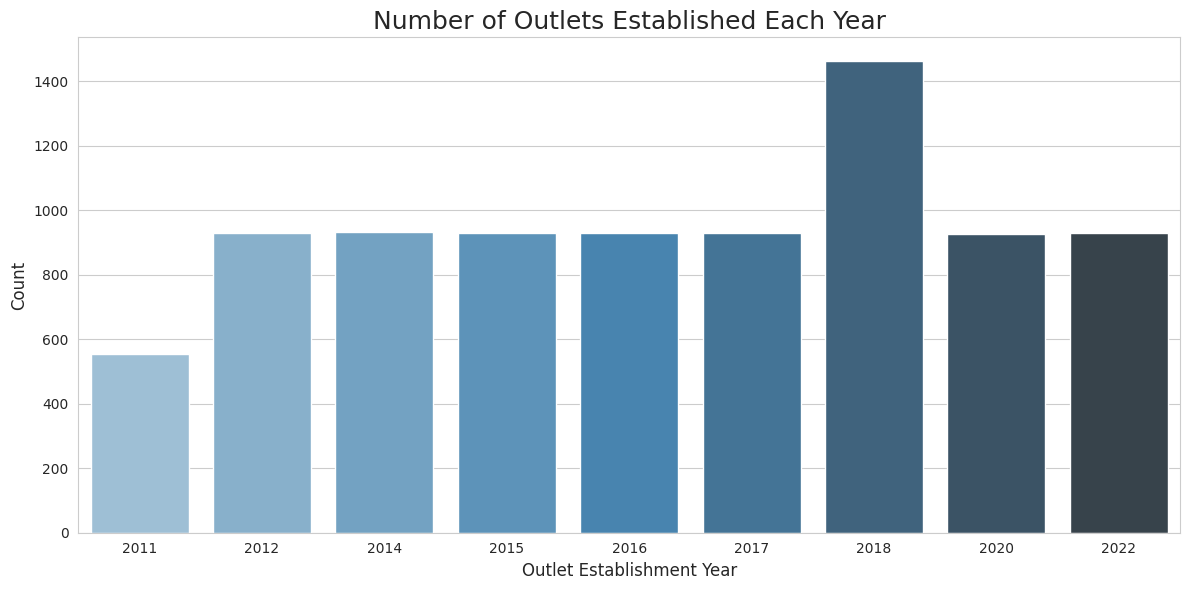

In [21]:

# 5. Count Plot: Number of Outlets Established Each Year
# This visualization shows the frequency of outlet establishment years
plt.figure(figsize=(12, 6))
sns.countplot(x='Outlet Establishment Year', data=df, palette='Blues_d')
plt.title('Number of Outlets Established Each Year', fontsize=18)
plt.xlabel('Outlet Establishment Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

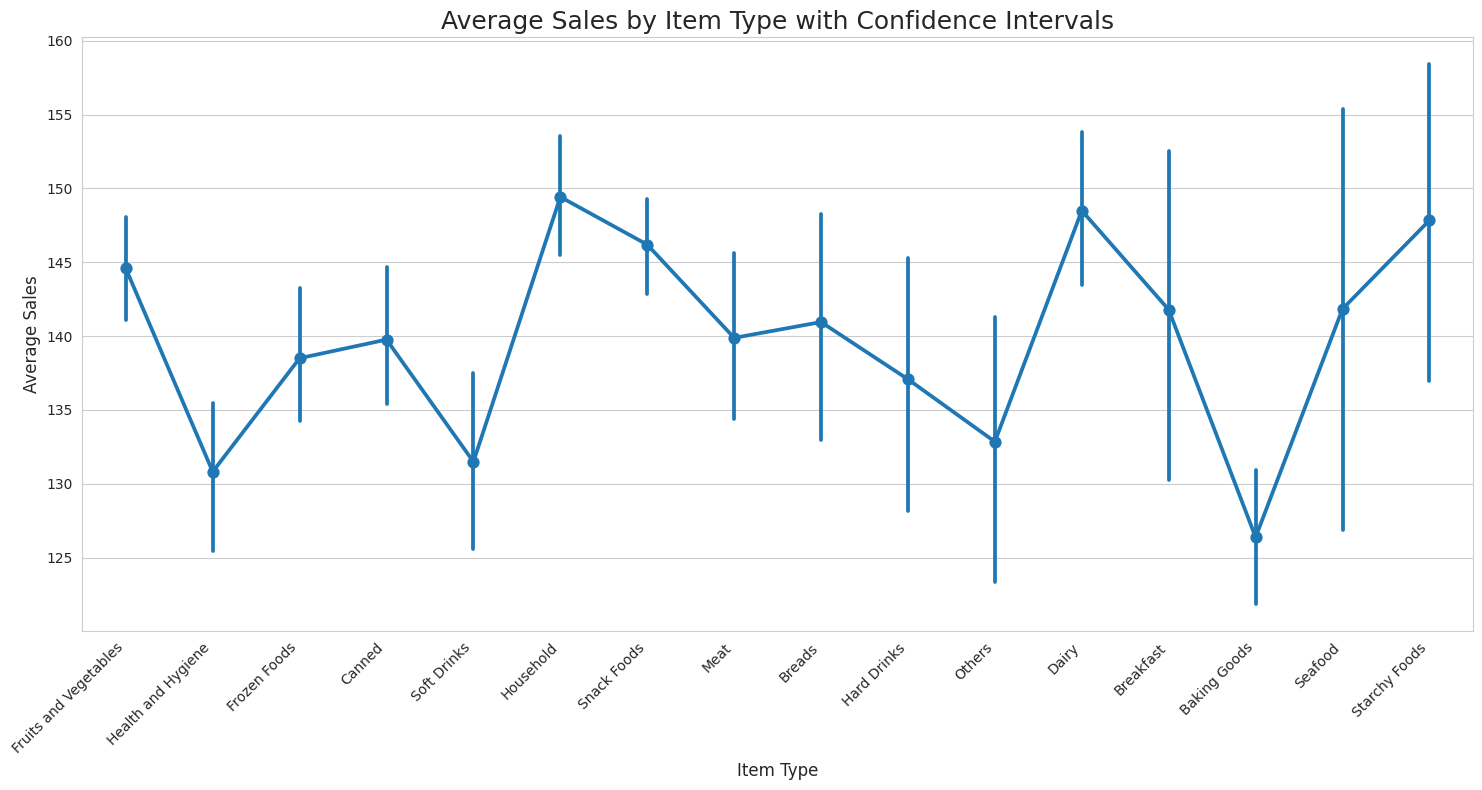

In [23]:
# 6. Point Plot: Sales by Item Type (with confidence intervals)
# This plot explicitly shows the mean sales for each item type with confidence bars
plt.figure(figsize=(15, 8))
sns.pointplot(x='Item Type', y='Sales', data=df, linestyle="-", markers="o")
plt.title('Average Sales by Item Type with Confidence Intervals', fontsize=18)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

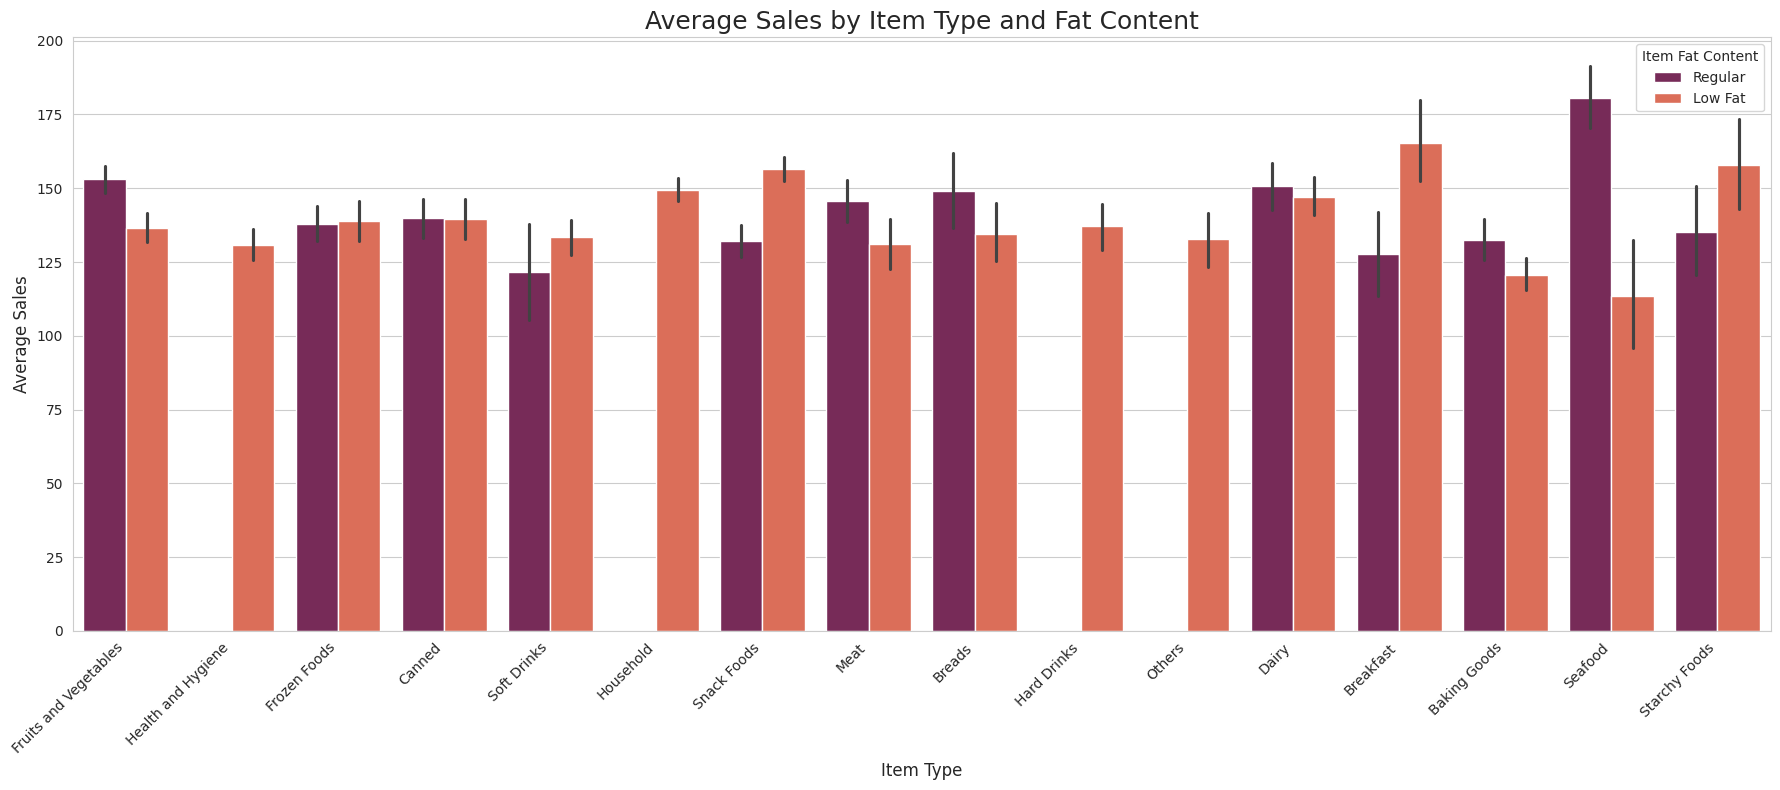

In [26]:
# 7. Grouped Bar Plot: Average Sales by Item Type and Fat Content
# This plot compares the average sales for different item types,
# further broken down by whether the item is 'Low Fat' or 'Regular'.
plt.figure(figsize=(18, 8))
sns.barplot(x='Item Type', y='Sales', hue='Item Fat Content', data=df, palette='rocket')
plt.title('Average Sales by Item Type and Fat Content', fontsize=18)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

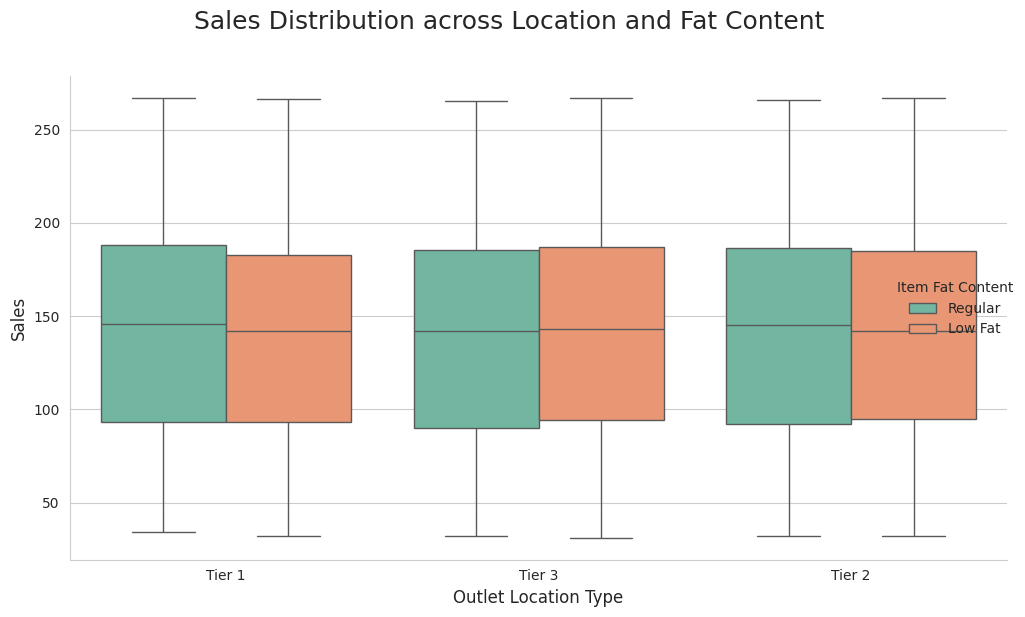

In [27]:

# 8. Catplot: Sales Distribution across Location and Fat Content
# This plot uses a FacetGrid to show how sales are distributed across
# different Outlet Location Types for both 'Low Fat' and 'Regular' items.
sns.catplot(x='Outlet Location Type', y='Sales', hue='Item Fat Content', kind='box', data=df, height=6, aspect=1.5, palette='Set2')
plt.suptitle('Sales Distribution across Location and Fat Content', fontsize=18, y=1.02)
plt.xlabel('Outlet Location Type', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.tight_layout()
plt.show()

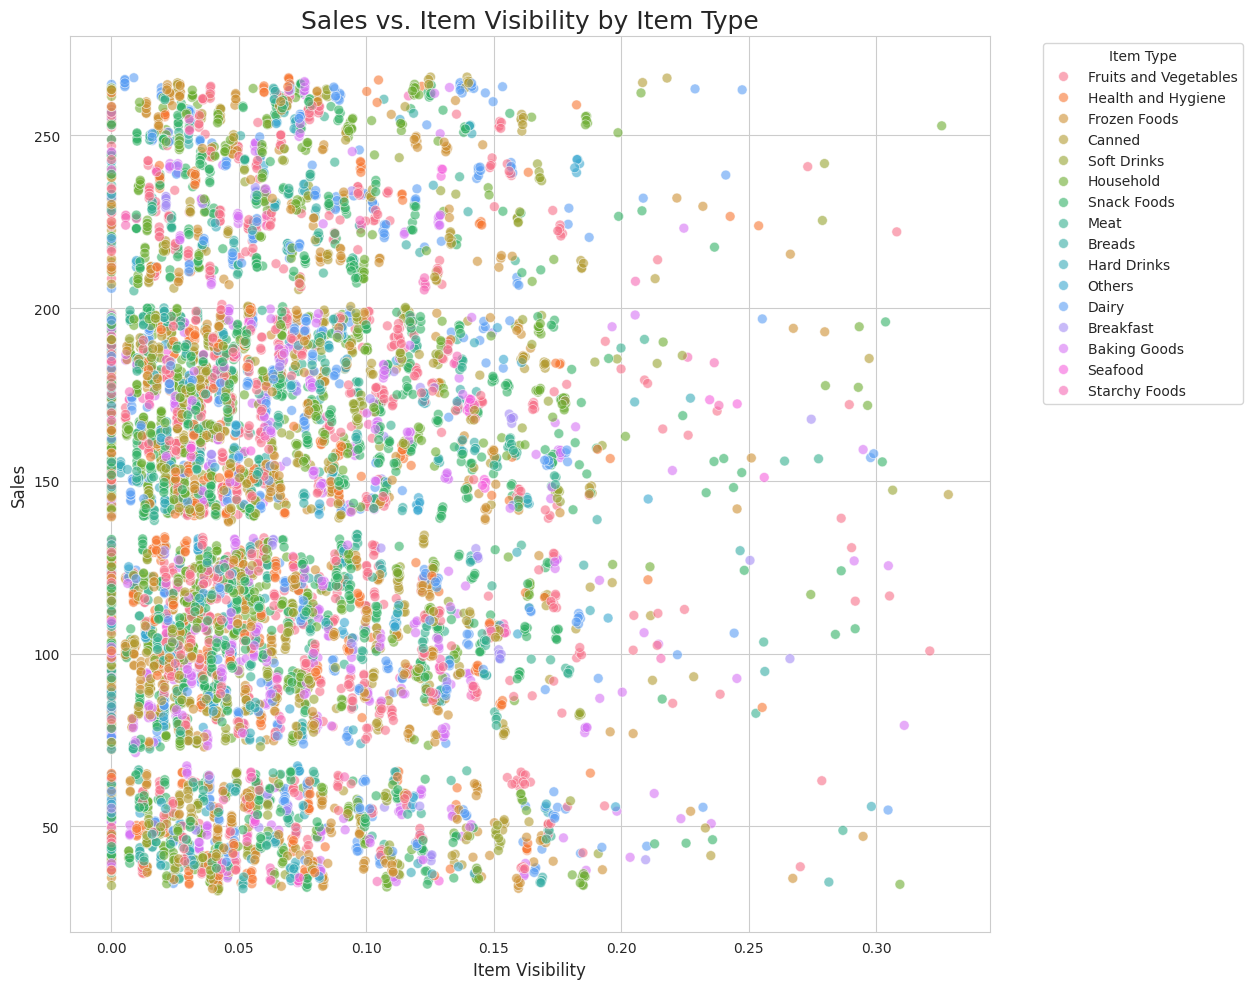

In [28]:
# 2. Item-Level Performance Analysis: Scatter Plot of Sales vs. Item Visibility, Colored by Item Type
# This plot helps visualize how sales are influenced by visibility across different item categories.
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Item Visibility', y='Sales', hue='Item Type', data=df, alpha=0.6, s=50)
plt.title('Sales vs. Item Visibility by Item Type', fontsize=18)
plt.xlabel('Item Visibility', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

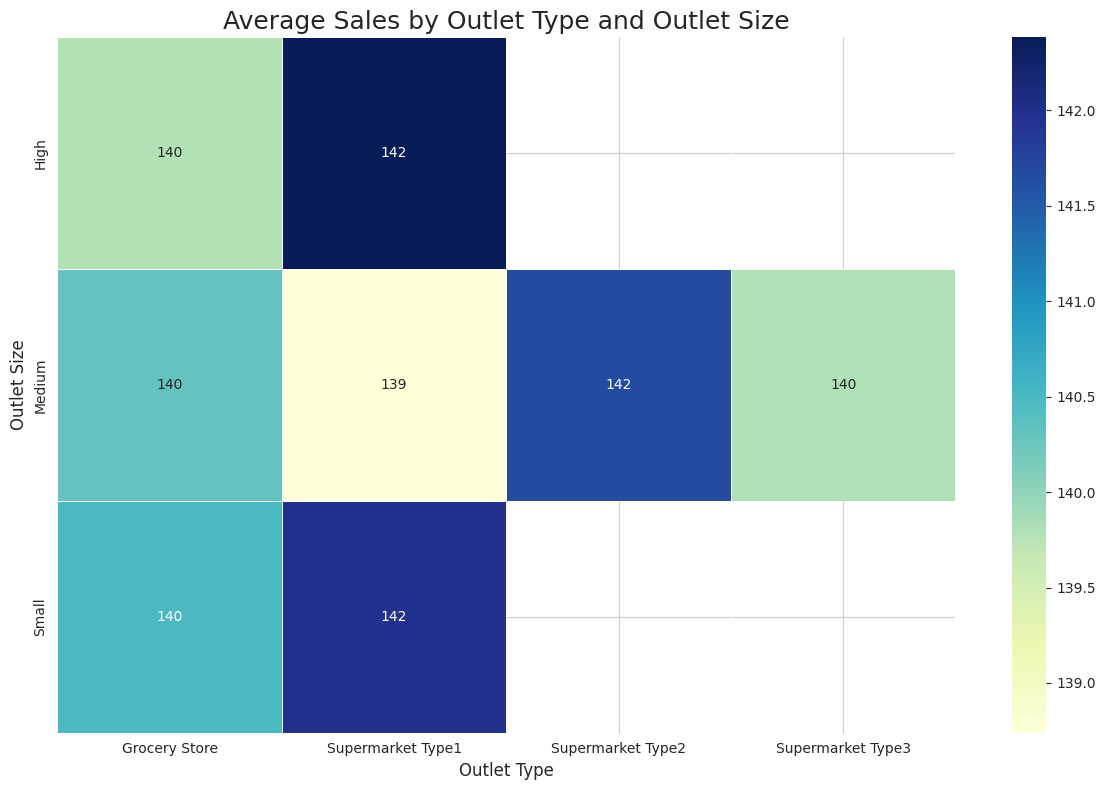

In [29]:
# 3. Distribution of Sales Across Outlet Type and Outlet Size: Heatmap
# This heatmap shows the average sales for each combination of outlet type and size.
# First, pivot the data to get average sales for each combination.
pivot_table = df.pivot_table(values='Sales', index='Outlet Size', columns='Outlet Type', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Sales by Outlet Type and Outlet Size', fontsize=18)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Outlet Size', fontsize=12)
plt.tight_layout()
plt.show()

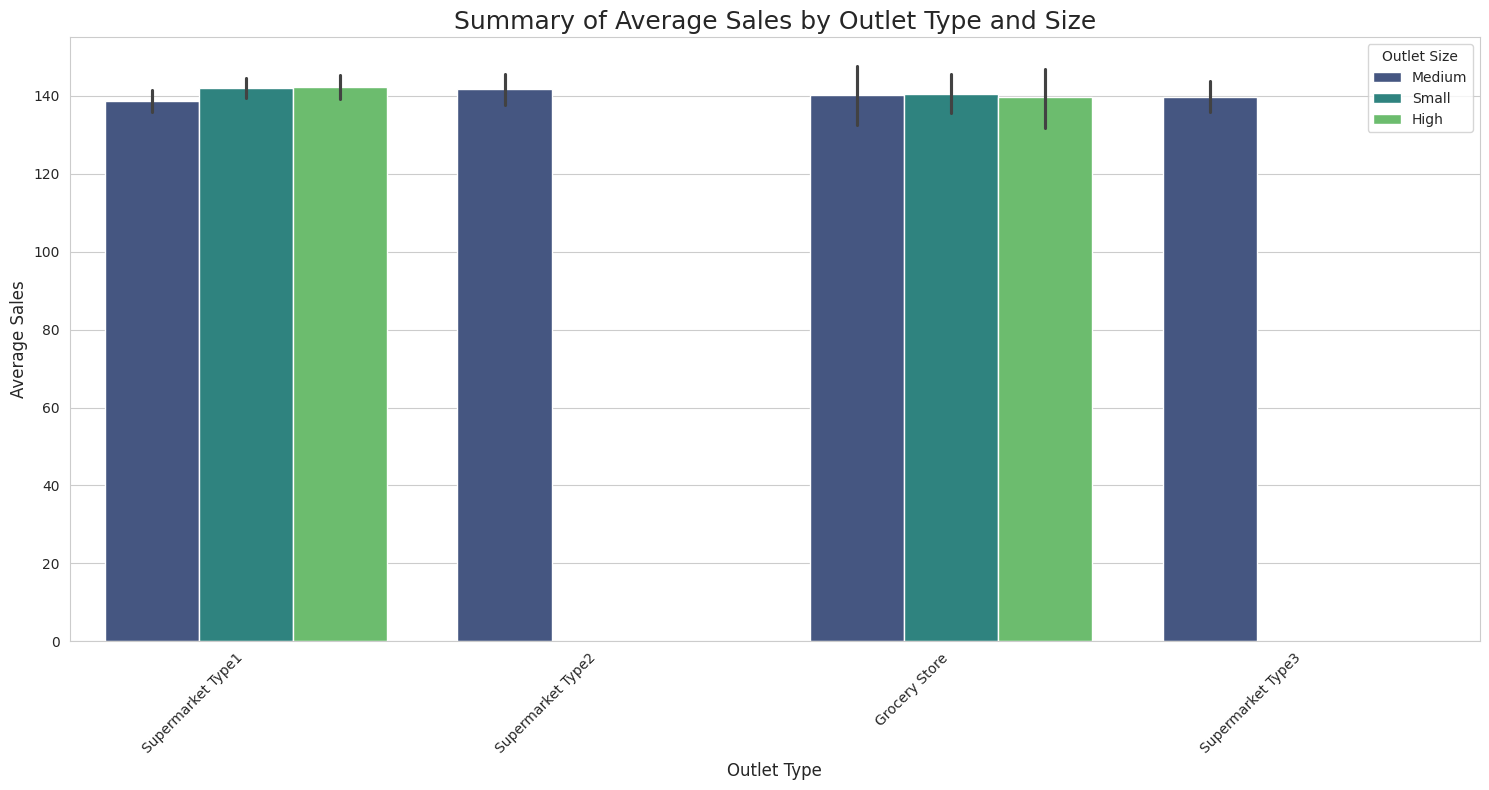

In [30]:
# --- Final Summary Visualization ---

# Grouped Bar Plot: Average Sales by Outlet Type and Outlet Size
# This plot provides a clear, high-level summary of which combinations
# of outlet type and size are the most and least profitable.
plt.figure(figsize=(15, 8))
sns.barplot(x='Outlet Type', y='Sales', hue='Outlet Size', data=df, palette='viridis')
plt.title('Summary of Average Sales by Outlet Type and Size', fontsize=18)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outlet Size', loc='upper right')
plt.tight_layout()
plt.show()

**Based on the comprehensive exploratory data analysis we've performed, here is a summary to conclude our findings.**
Key Takeaways from the Analysis:  

-Gained a clear understanding of the dataset’s structure, types of variables, and their distributions.

-Identified missing values, outliers, and data inconsistencies early, enabling targeted cleaning.

-Discovered key business patterns such as top-performing products, categories, and outlets.

-Observed potential seasonal and temporal sales trends without building a predictive model.

-Determined the dataset’s readiness for further analysis and modeling, with specific improvement steps identified.

-Established a foundation for effective feature engineering and data-driven decision-making.

-Provided actionable insights that can help optimize inventory, target promotions, and improve overall sales performance.